# **BANK MARKETING CAMPAIGN**


## **BUSINESS UNDERSTANDING**
---

**Context**  
Jenis produk keuangan yang digunakan masyarakat semakin bervariasi. Salah satu produk keuangan yang banyak dikenal masyarakat adalah deposito berjangka. Mekanisme deposito berjangka adalah nasabah menyetorkan sejumlah uangnya ke bank atau lembaga keuangan, dan uang tersebut baru dapat ditarik setelah jangka waktu tertentu. Sebagai imbalannya, nasabah akan diberikan bunga tetap sesuai dengan jumlah nominal uang yang disetorkan.

Meski demikian, sebagai badan usaha yang memiliki produk keuangan dan nasabah masing-masing, bank tetap harus bersaing agar tidak kehilangan nasabah. Salah satu cara untuk mendapatkan pelanggan baru adalah dengan melakukan kampanye pemasaran.
Target :

0 : Tidak deposit

1 : Deposit

**Problem Statement**

Proses campaign penawaran deposit memakan waktu dan biaya, Bank ingin melakukan efisiensi proses campaign dengan menargetkan ke calon nasabah yang memiliki potensi untuk menaruh deposit.


**Goals**

Berdasarkan problem tersebut, bank ingin memiliki kemampuan untuk memprediksi kemungkinan kandidat nasabah untuk yang ingin melakukan deposit atau tidak, sehingga dapat menargetkan campaign pada kandidat yang memiliki potensial melakukan deposit

**Analytic Approach**

Kita akan menganalisis data untuk menemukan pola yang membedakan kandidat nasabah yang akan melakukan deposit atau tidak.

Kemudian, dilanjutkan dengan membangun model klasifikasi yang akan membantu bank untuk dapat memprediksi probabilitas seorang kandidat nasabah akan/ingin melakukan deposit atau tidak.

**Evaluation Metric**

Type 1 error : False Positive  
Konsekuensi: membuang waktu dan biaya campaign untuk nasabah yang tidak berpotensial menaruh deposit

Type 2 error : False Negative  
Konsekuensi: kehilangan kandidat nasabah potensial

Berdasarkan konsekuensinya, maka sebisa mungkin akan dibuat model yang dapat mengurangi cost campaign dari bank, tetapi tanpa membuat menjadi kurangnya kandidat nasabah potensial yang dicari oleh bank. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive. Sehingga yang akan kita gunakan adalah F1 Score.





In [2]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder, OrdinalEncoder
import category_encoders as ce


# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import f1_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## **DATA UNDERSTANDING**
----

Information

* age: Usia nasabah
* job : Pekerjaan nasabah 
* balance : Saldo nasabah di rekening 
* housing : Apakah nasabah mempunyai pinjaman untuk pembelian rumah 
* loan : Apakah nasabah mempunyai pinjaman pribadi 
* contact : Jenis komunikasi yang digunakan
* month : Bulan terakhir kali melakukan kontak pada tahun ini  
* campaign : Jumlah kontak yang dilakukan selama kampanye untuk nasabah ini 
* pdays : jumlah hari yang berlalu setelah nasabah terakhir dihubungi dari kampanye sebelumnya
* poutcome : Hasil dari kampanye pemasaran sebelumnya 
* deposit : Apakah nasabah melakukan deposito atau tidak

### **Load Dataset**

In [3]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no



## **EXPLORATORY DATA ANALYSIS**
---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


**Descriptive Statistics**

In [5]:
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


In [6]:
df.describe(include='object')

,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


- Dataset awal terdiri dari 7813 baris dan 11 kolom dengan tipe data integer dan object
- Rentang usia nasabah berada pada 18-95 tahun
- Saldo nasabah terbanyak adalah $66,653
- Nasabah paling sering dihubungi sebanyak 63x
- Mayoritas nasabah mempunyai pekerjaan management sebanyak 1792 orang
- Mayoritas nasabah tidak mempunyai pinjaman perumahan dan pinjaman pribadi
- Kontak dengan nasabah paling banyak dilakukan melalui seluler
- Karena value pada kolom deposit (target) masih berupa string, kita akan melakukan encoding dengan mengganti nilai 'yes' menjadi 1 dan 'no' menjadi 0


## **DATA CLEANING, FEATURE SELECTION AND FEATURE ENGINEERING**
---

In [7]:
# shape sebelum
df.shape

(7813, 11)

**Missing Values**

In [8]:
# mengecek Missing Value
df.isnull().sum()

# tidak memiliki missing value

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

**Duplicated Data**

In [9]:
# Mengecek Duplicate
df.duplicated().sum()

# dataset memiliki data duplikat sehingga duplikat akan di hapus

8

In [10]:
# Menghapus duplikat
df = df.drop_duplicates()

In [11]:
# shape setelah
df.shape

(7805, 11)

- Dataset awal terdiri dari 7813 baris dan 11 kolom dengan tipe data integer dan object
- Dataset tidak memiliki missing value, dataset memiliki 8 baris duplikat sehingga diputuskan untuk dihapus/drop sehingga data menjadi 7805 baris informasi nasabah
- Jumlah nasabah pada dataset adalah 7805 (didapatkan setelah drop data duplikat sebanayk 8 baris data)

**Unique**

In [12]:
# Mengecek Unique

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,0,0.0,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,0,0.0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,0,0.0,2,"[no, yes]"
4,loan,object,0,0.0,2,"[no, yes]"
5,contact,object,0,0.0,3,"[cellular, telephone, unknown]"
6,month,object,0,0.0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,0,0.0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,0,0.0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,0,0.0,4,"[unknown, other, failure, success]"


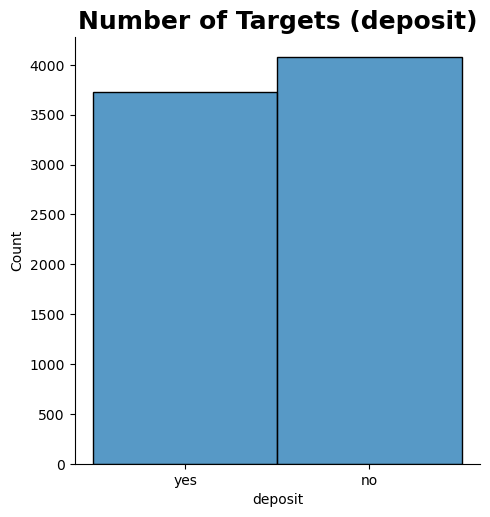

In [13]:
sns.displot(data = df, x = 'deposit')
plt.title("Number of Targets (deposit)", size=18, weight='bold')
plt.show()

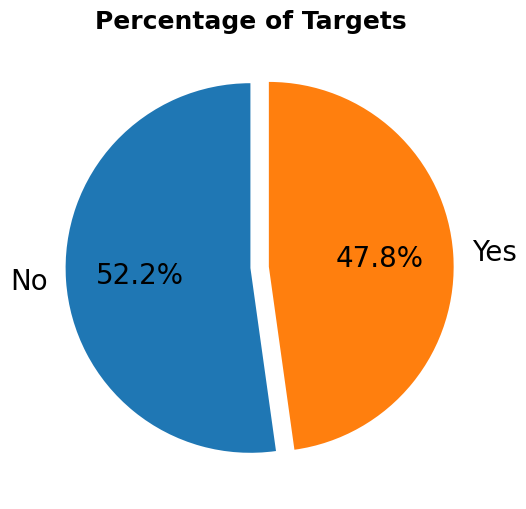

In [14]:
plt.figure(figsize=(6,6))
plt.title("Percentage of Targets", size=18, weight='bold')
plt.pie(df['deposit'].value_counts(), explode=(0,0.1), labels=['No', 'Yes'], autopct='%1.1f%%', 
        startangle=90, textprops={"fontsize":20})

plt.show()

## **Simple EDA**

In [15]:
numerical_features = df.drop(columns=['job', 'housing', 'loan', 'contact', 'month', 'poutcome']).describe().columns
numerical_features

Index(['age', 'balance', 'campaign', 'pdays'], dtype='object')

In [16]:
from scipy.stats import normaltest

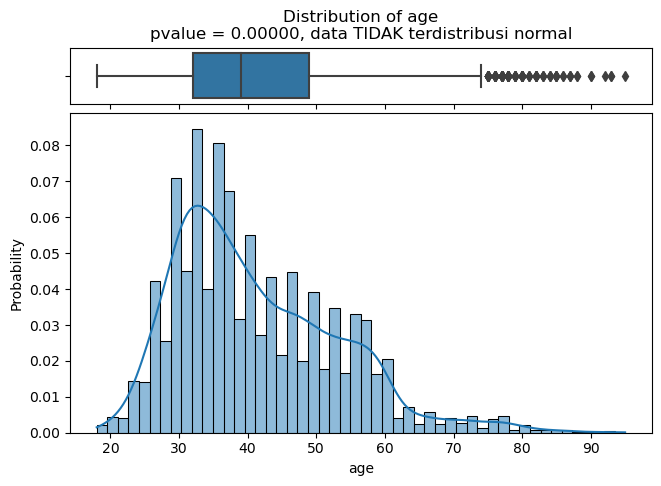

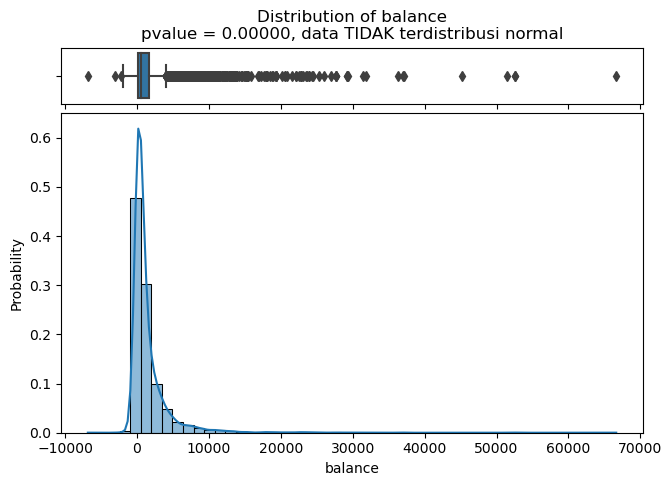

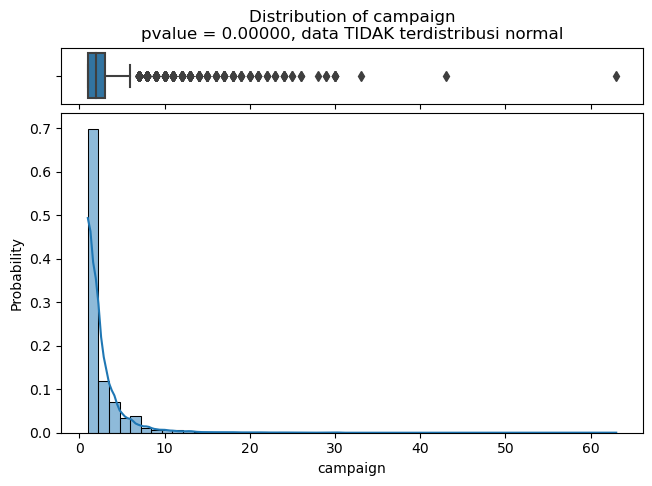

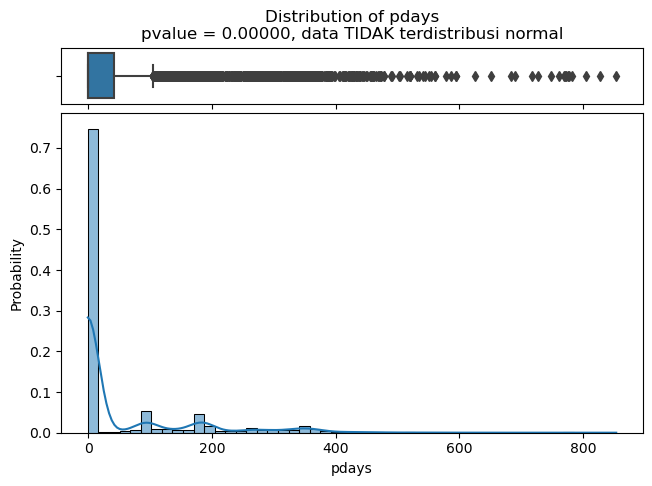

In [17]:
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "probability", kde=True, bins=50)

    plt.show()

- Data pada kolom numerikal tidak terdistribusi normal

**Categorical Features**

In [18]:
categorical_features = df.describe(include='object').columns
categorical_features

Index(['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'], dtype='object')

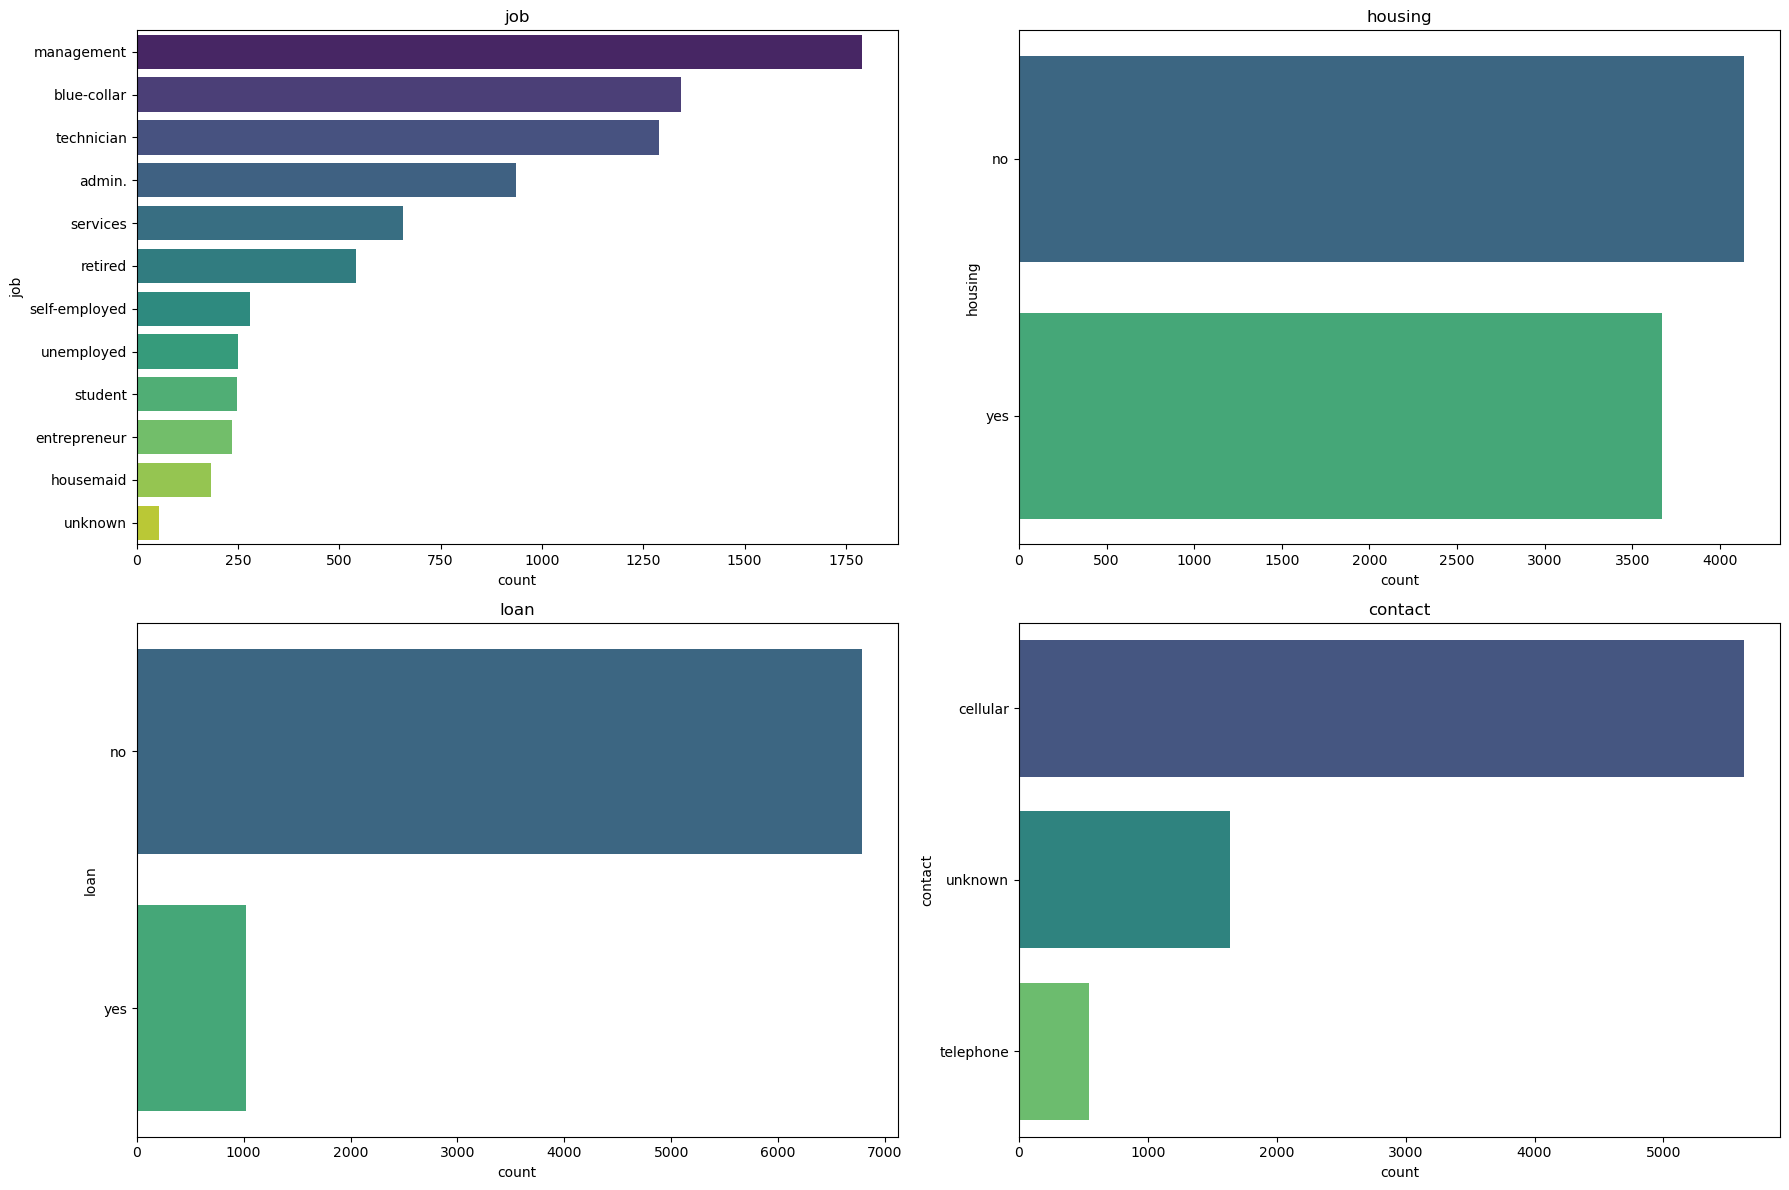

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12)) 
for i, j in zip(categorical_features, axes.flatten()):
    ax = sns.countplot(data=df, y= i, ax= j,palette='viridis', order=df[i].value_counts().index)
    ax.set_title(f'{i}',size = 12) 
plt.tight_layout()

plt.show()

**Interpretasi :**
- Nasabah dengan pekerjaan Management dan Blue-collar menjadi yang paling banyak
- Nasabah yang tidak mempunyai pinjaman perumahan (No Housing) pada dataset lebih banyak daripada yang mempunyai pinjaman
- Nasabah yang tidak mempunyai pinjaman pribadi (No Loan) pada dataset lebih banyak daripada yang mempunyai pinjaman
- Nasabah paling banyak dikontak / dihubungi melalui seluler

## **DATA ANALYSIS**
---

**Plot of categorical features vs target**

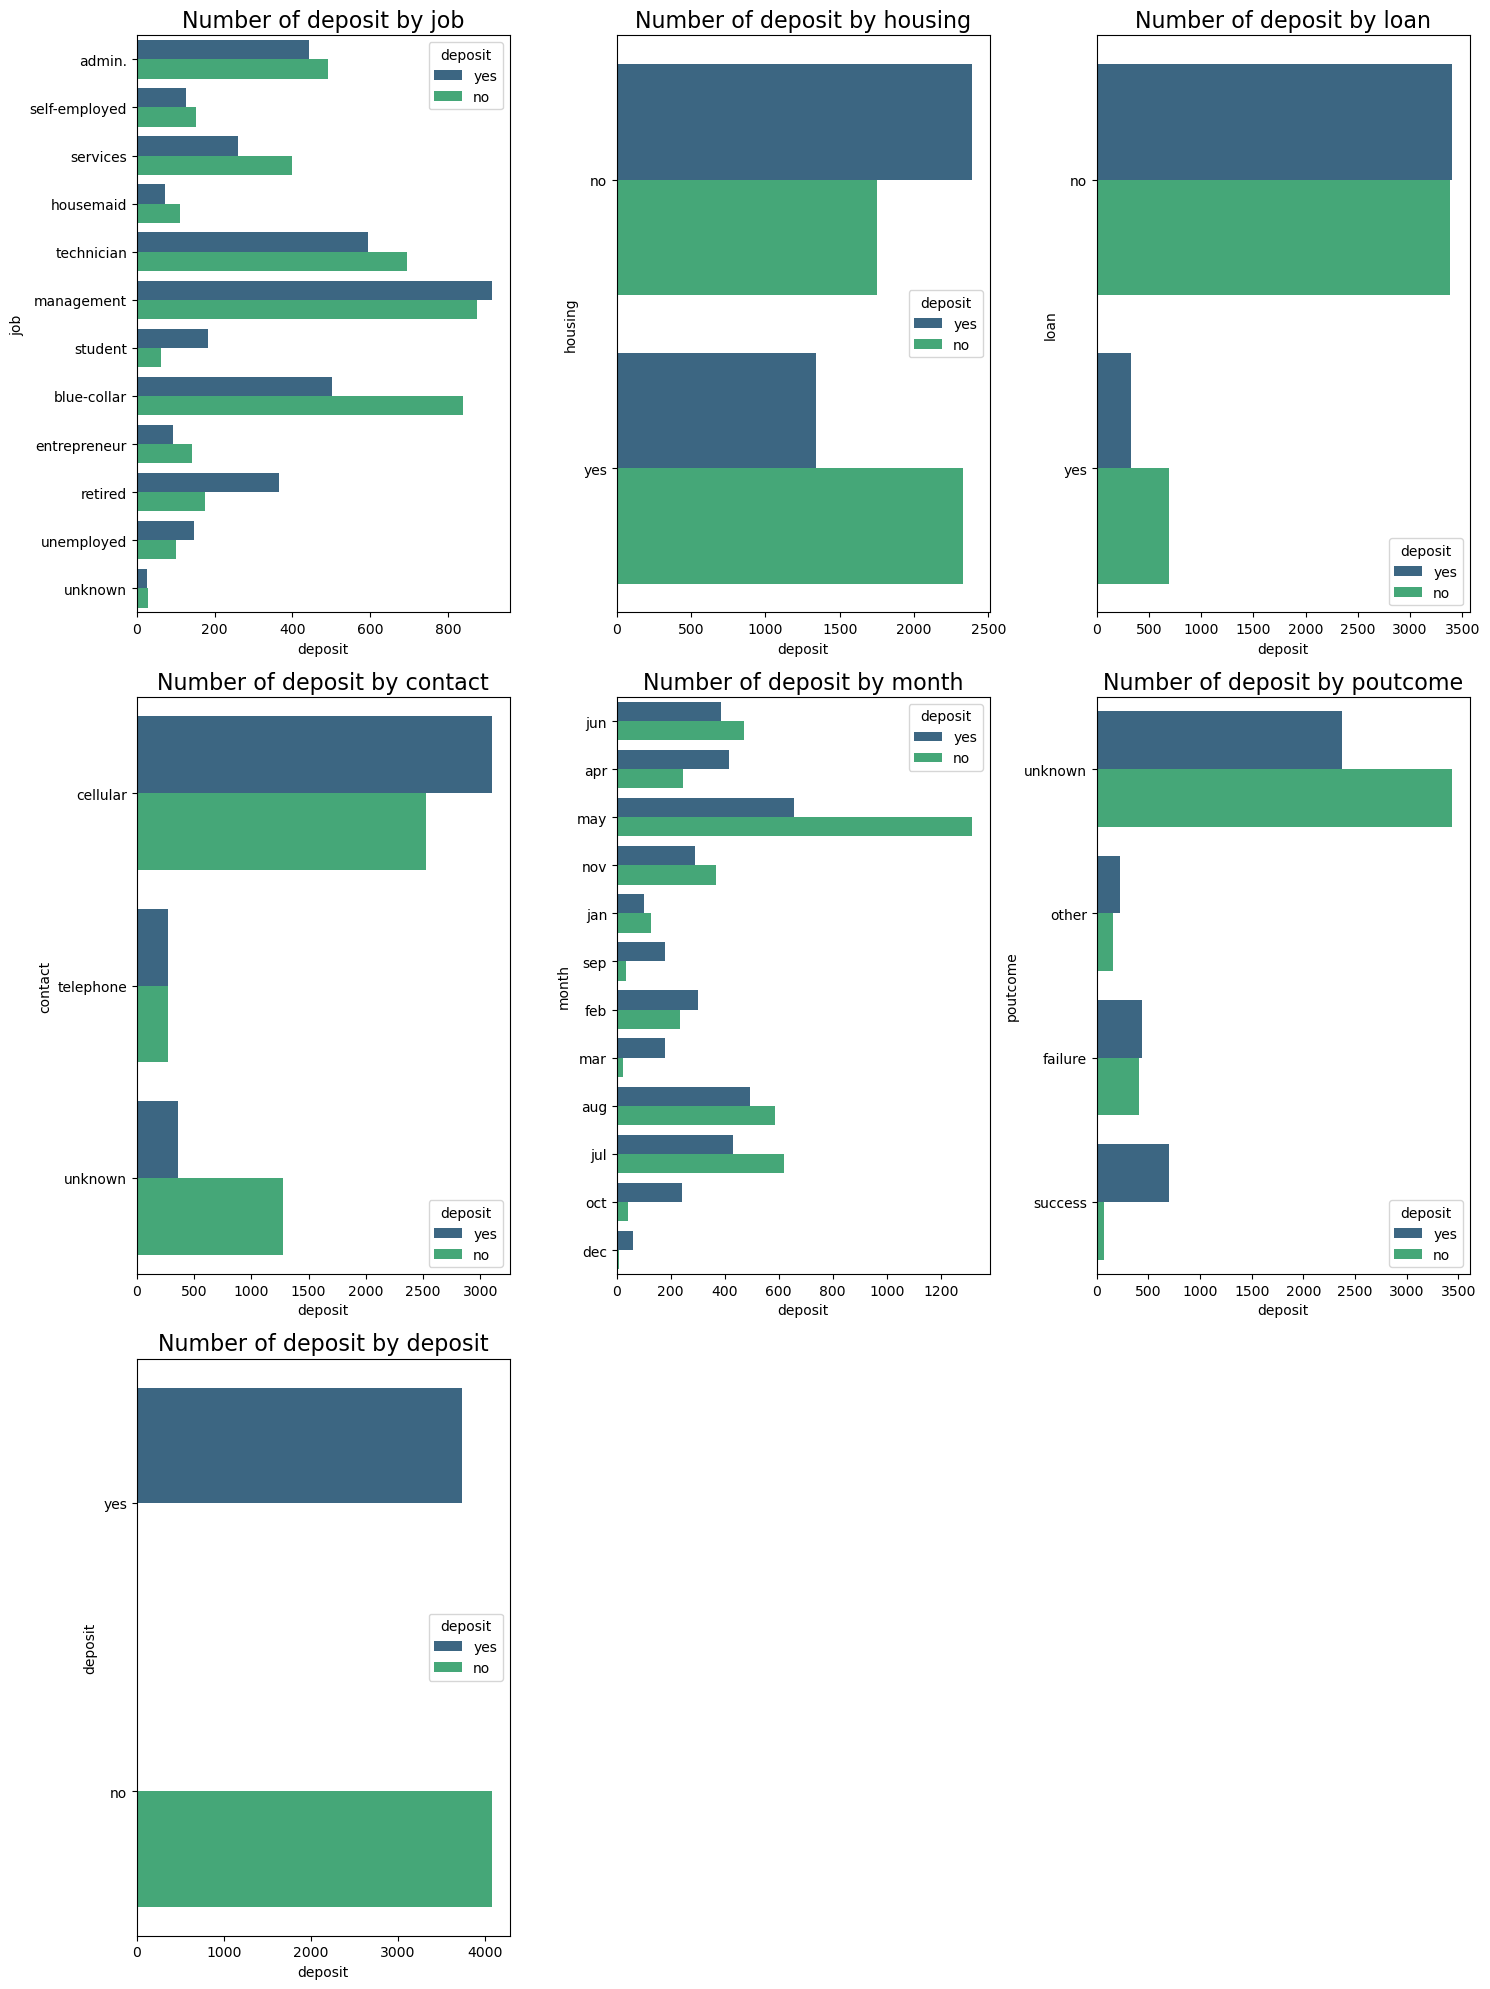

In [20]:
plt.figure(figsize=(15,20))
plotnumber = 1

for feature in categorical_features:
    ax = plt.subplot(3, 3, plotnumber)
    sns.countplot(data = df, y = feature, hue = 'deposit', palette='viridis')
    plt.xlabel('deposit')
    plt.title(f'Number of deposit by {feature}', fontsize=16)
    plotnumber += 1
    plt.tight_layout();

**Interpretasi** :
- Nasabah dengan pekerjaan Management melakukan deposit terbanyak diikuti oleh technician
- Nasabah yang tidak mempunyai pinjaman perumahan (No Housing) cenderung untuk melakukan deposit
- Nasabah yang tidak mempunyai pinjaman pribadi (No Loan) cenderung untuk melakukan deposit
- Nasabah yang dihubungi melalui seluler cenderung untuk melakukan deposit

### **Numerical Features Correlation**

Karena Data tidak terdistribusi normal, maka kita menggunakan spearman Method dalam mencari Korelasi

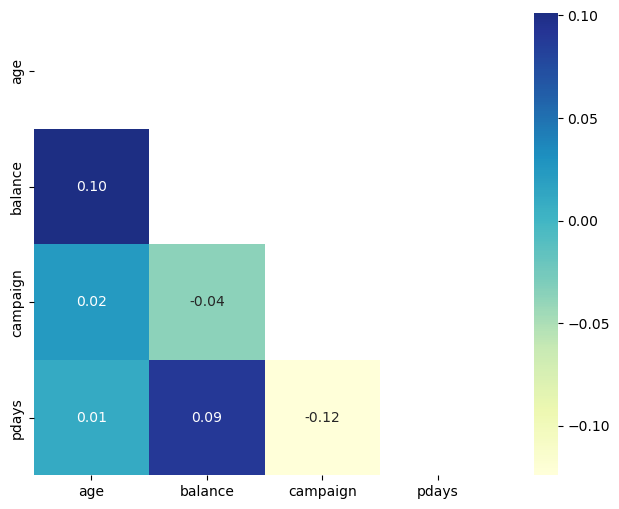

In [21]:
plt.figure(figsize=(10,6))

matrix = np.triu(df[numerical_features].corr(method='spearman'))

sns.heatmap(data=df[numerical_features].corr(method='spearman'), annot=True, fmt='.2f',cmap='YlGnBu', center=0, mask = matrix, square='True')
plt.show()

Dari heatmap korelasi diatas, diketahui bahwa antar kolom numerikal mempunyai korelasi yang lemah

## **MODELLING**
---

## **Data Preparation**

In [22]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


### **Change Value**

In [23]:
# mengganti kolom job yaitu admin. menjadi admin
df['job'] = df['job'].replace('admin.', 'admin')

In [24]:
# Mengubah nilai pada kolom deposit
df['deposit'] = np.where(df['deposit']=='yes', 1, 0)

### **Handling Outliers**

In [25]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,age,6.5,74.5,0,7684,121,1.55
1,balance,-2207.5,4020.5,3,7069,733,9.43
2,campaign,-2.0,6.0,0,7376,429,5.50
3,pdays,-64.0,104.0,0,6373,1432,18.35


In [26]:
# proporsi target pada dataset awal
df['deposit'].value_counts()/len(df) * 100

0    52.210122
1    47.789878
Name: deposit, dtype: float64

In [27]:
# proporsi target untuk data outlier pada kolom age
df[df['age']>74.5]['deposit'].value_counts()/len(df[df['age']>74.5]) * 100

1    77.68595
0    22.31405
Name: deposit, dtype: float64

In [28]:
# proporsi target untuk data outlier pada kolom balace
df[(df['balance']>4020.5) | (df['balance']<-2207.5)]['deposit'].value_counts()/len(df[(df['balance']>4020.5) | (df['balance']<-2207.5)]) * 100

1    58.559783
0    41.440217
Name: deposit, dtype: float64

In [29]:
# proporsi target untuk data outlier pada kolom campaign
df[df['campaign']>5]['deposit'].value_counts()/len(df[df['campaign']>5]) * 100

0    71.2
1    28.8
Name: deposit, dtype: float64

In [30]:
# proporsi target untuk data outlier pada kolom pdays
df[df['pdays']>104]['deposit'].value_counts()/len(df[df['pdays']>104]) * 100

1    62.430168
0    37.569832
Name: deposit, dtype: float64

- Data-data outlier tersebut memiliki proporsi 0 dan 1 pada kolom **deposit** yang berbeda dibandingkan seluruh data. Sehingga kita tidak akan hilangkan outlier tersebut karena data outlier tersebut memiliki informasi yang berpengaruh terhadap target.

### **Cek apakah Imbalance Data ?**

In [31]:
# proporsi target pada dataset awal
df['deposit'].value_counts() / len(df)*100

0    52.210122
1    47.789878
Name: deposit, dtype: float64

### **Encoding**

In [32]:
df.describe(include='object')

,job,housing,loan,contact,month,poutcome
count,7805,7805,7805,7805,7805,7805
unique,12,2,2,3,12,4
top,management,no,no,cellular,may,unknown
freq,1789,4136,6781,5623,1973,5811


Kita akan melakukan fitur encoding untuk fitur-fitur categorical.
Yang akan kita lakukan adalah :


1. Merubah fitur/kolom `job` and `month` menggunakan Binary Encoding, karena fitur ini memiliki nilai unique masing-masing sebesar 12 (jumlah unique datanya cukup banyak).
2. Merubah fitur/kolom `housing`, `loan`, `contact`, `poutcome` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.


In [33]:
# encoder
transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(drop='first'), ['housing', 'loan', 'contact','poutcome']),
    ('binary', BinaryEncoder(), ['job', 'month'] )
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('binary', BinaryEncoder(), ['job', 'month'])])

### **Scaling**

Kita akan menggunakan Robust Scaler karena data memiliki outlier dan Robust Scaler tidak akan terpengaruh oleh outlier. Sehingga diputuskan menggunakan RobustScaler dalam scaling.

In [33]:
# scaling features 
robust = RobustScaler()

### **Define Features (X) and Target (y)**

In [34]:
# Features
X = df.drop(columns=['deposit'])

# Target
y = df['deposit']

In [35]:
df


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,1
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,0
7811,31,admin,54,yes,no,cellular,nov,1,-1,unknown,0


### **Data Splitting**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0,stratify=y)

### **Model Benchmarking** 

**Percobaan 1 (Masih menggunakan data awal, Data masih mengandung nilai unknown dan others)**

In [37]:
# Define the models

# Logistic Regression
logreg = LogisticRegression(solver='liblinear', max_iter = 200, random_state =0)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Decision Tree
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_depth=5, random_state=0)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
adaboost = AdaBoostClassifier(random_state=0)

# Gradientboost
gradboost = GradientBoostingClassifier(random_state=0)

# ExtremeGradientBoost
xgboost = XGBClassifier(random_state=0, verbosity=0)

In [38]:
# Pilihan model
models = [logreg, knn, tree, rf, adaboost, gradboost, xgboost]

list_mean = []
list_std = []
list_all_score = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :

    # Pipeline berisi 3 tahap, untuk diisi di pada estimator di cross val
    pipe_model = Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('model', algoritma)
    ])

    # cross validation
    skfold = StratifiedKFold(n_splits = 5)
    
    model_cv = cross_val_score(
        estimator=pipe_model,
        X = X_train,    
        y = y_train,
        cv = skfold,
        scoring = 'f1',
        error_score='raise'
       
        
    )

    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())
    list_all_score.append(model_cv.round(4))

In [39]:
# Perbandingan performa antar model
pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XGBoost'],
    'mean': list_mean,
    'std': list_std,
    'all_score' : list_all_score
}).sort_values('mean', ascending=False)

,model,mean,std,all_score
3,Random Forest,0.674673,0.014240,"[0.6713, 0.6978, 0.6532, 0.6738, 0.6773]"
5,Gradient Boost,0.673834,0.022455,"[0.6739, 0.7081, 0.644, 0.6865, 0.6566]"
4,Ada Boost,0.662463,0.019160,"[0.6751, 0.6814, 0.6286, 0.6727, 0.6544]"
6,XGBoost,0.660645,0.015147,"[0.6637, 0.683, 0.6475, 0.6685, 0.6406]"
0,Logistic Regression,0.647960,0.016908,"[0.6445, 0.6733, 0.6261, 0.6601, 0.6358]"
1,KNN,0.645348,0.019687,"[0.6667, 0.6615, 0.6296, 0.6537, 0.6152]"
2,Decision Tree,0.594541,0.045985,"[0.5831, 0.5255, 0.5744, 0.6348, 0.6549]"


**Percobaan 2 (menghapus kolom poutcome yang mempunyai proporsi nilai unknown dan others mencapai 79%)**

In [40]:
# proporsi value 'unknown' dan 'other' pada kolom poutcome
len(df[(df['poutcome']=='unknown') | (df['poutcome']=='other')])/len(df)

0.7938500960922485

In [41]:
df['poutcome'].value_counts()

poutcome
unknown    5811
failure     848
success     761
other       385
Name: count, dtype: int64

In [42]:
df = df.drop(columns='poutcome')

### **Encoding untuk Percobaan 2**

In [43]:
transformer2 = ColumnTransformer([
    ('one hot', OneHotEncoder(drop='first'), ['housing', 'loan', 'contact']),
    ('binary', BinaryEncoder(), ['job', 'month'] )
], remainder='passthrough')
transformer2

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact']),
                                ('binary', BinaryEncoder(), ['job', 'month'])])

In [44]:
# Features
X = df.drop(columns=['deposit'])

# Target
y = df['deposit']

In [45]:
X

,age,job,balance,housing,loan,contact,month,campaign,pdays
0,55,admin,1662,no,no,cellular,jun,2,-1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1
2,51,admin,3025,no,no,cellular,may,1,352
3,38,services,-87,yes,no,cellular,may,1,-1
4,36,housemaid,205,yes,no,telephone,nov,4,-1
...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1
7809,48,housemaid,5473,no,no,cellular,feb,2,184
7810,36,unknown,179,no,no,cellular,aug,8,-1
7811,31,admin,54,yes,no,cellular,nov,1,-1


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0,stratify=y)

In [47]:
# Define the models

# Logistic Regression
logreg = LogisticRegression(solver='liblinear', max_iter = 200, random_state =0)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Decision Tree
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_depth=5, random_state=0)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
adaboost = AdaBoostClassifier(random_state=0)

# Gradientboost
gradboost = GradientBoostingClassifier(random_state=0)

# ExtremeGradientBoost
xgboost = XGBClassifier(random_state=0, verbosity=0)

In [48]:
# Pilihan model
models = [logreg, knn, tree, rf, adaboost, gradboost, xgboost]

list_mean = []
list_std = []
list_all_score = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :

    # Pipeline berisi 3 tahap, untuk diisi di pada estimator di cross val
    pipe_model = Pipeline([
        ('preprocess', transformer2),
        ('scaler', robust),
        ('model', algoritma)
    ])

    # cross validation
    skfold = StratifiedKFold(n_splits = 5)
    
    model_cv = cross_val_score(
        estimator=pipe_model,
        X = X_train,    
        y = y_train,
        cv = skfold,
        scoring = 'f1',
        error_score='raise'
       
        
    )

    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())
    list_all_score.append(model_cv.round(4))

In [49]:
# Perbandingan performa antar model
pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XGBoost'],
    'mean': list_mean,
    'std': list_std,
    'all_score' : list_all_score
}).sort_values('mean', ascending=False)

,model,mean,std,all_score
3,Random Forest,0.677829,0.016143,"[0.6626, 0.6983, 0.6591, 0.6948, 0.6744]"
5,Gradient Boost,0.672667,0.014669,"[0.6673, 0.6913, 0.6613, 0.6886, 0.6549]"
4,Ada Boost,0.668146,0.017206,"[0.6708, 0.6905, 0.6437, 0.6816, 0.6541]"
6,XGBoost,0.657589,0.016863,"[0.6637, 0.6811, 0.6376, 0.6667, 0.6389]"
0,Logistic Regression,0.656496,0.015928,"[0.6599, 0.686, 0.6411, 0.6474, 0.6481]"
1,KNN,0.639385,0.015212,"[0.6632, 0.6483, 0.6229, 0.6384, 0.624]"
2,Decision Tree,0.588816,0.028349,"[0.6293, 0.5471, 0.599, 0.5687, 0.6]"


**Percobaan 3 (menghapus semua data yang mengandung nilai unknown dan others)** 

In [50]:
df.shape

(7805, 10)

In [51]:
# baris yang memuat nilai 'unknown' pada kolom job
df[df['job']=='unknown'].index

Index([ 103,  110,  332,  902,  981, 1039, 1073, 1079, 1142, 1230, 1543, 1844,
       2220, 2223, 2251, 2272, 2372, 2436, 3087, 3186, 3362, 3506, 3533, 3734,
       3921, 4148, 4221, 4417, 4478, 4607, 4743, 5007, 5035, 5071, 5170, 5348,
       5748, 5808, 5991, 6065, 6201, 6322, 6445, 6463, 6496, 6772, 6845, 6983,
       7009, 7101, 7203, 7324, 7495, 7810],
      dtype='int64')

In [52]:
# menghapus nilai 'unknown' pada setiap baris pada kolom contact
df = df.drop(index=list(df[df['job']=='unknown'].index))

In [53]:
df.shape

(7751, 10)

In [54]:
# menghapus nilai 'unknown' pada setiap baris pada kolom contact
df = df.drop(index=list(df[df['contact']=='unknown'].index))

In [55]:
df.shape

(6123, 10)

In [56]:
# Features
X = df.drop(columns=['deposit'])

# Target
y = df['deposit']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0,stratify=y)

In [58]:
# Define the models

# Logistic Regression
logreg = LogisticRegression(solver='liblinear', max_iter = 200, random_state =0)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Decision Tree
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_depth=5, random_state=0)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
adaboost = AdaBoostClassifier(random_state=0)

# Gradientboost
gradboost = GradientBoostingClassifier(random_state=0)

# ExtremeGradientBoost
xgboost = XGBClassifier(random_state=0, verbosity=0)

In [59]:
# Pilihan model
models = [logreg, knn, tree, rf, adaboost, gradboost, xgboost]

list_mean = []
list_std = []
list_all_score = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :

    # Pipeline berisi 3 tahap, untuk diisi di pada estimator di cross val
    pipe_model = Pipeline([
        ('preprocess', transformer2),
        ('scaler', robust),
        ('model', algoritma)
    ])

    # cross validation
    skfold = StratifiedKFold(n_splits = 5)
    
    model_cv = cross_val_score(
        estimator=pipe_model,
        X = X_train,    
        y = y_train,
        cv = skfold,
        scoring = 'f1',
        error_score='raise'
       
        
    )

    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())
    list_all_score.append(model_cv.round(4))

In [60]:
# Perbandingan performa antar model
pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XGBoost'],
    'mean': list_mean,
    'std': list_std,
    'all_score' : list_all_score
}).sort_values('mean', ascending=False)

,model,mean,std,all_score
5,Gradient Boost,0.702930,0.010119,"[0.6945, 0.6972, 0.7026, 0.7225, 0.6979]"
3,Random Forest,0.702075,0.012089,"[0.7114, 0.6861, 0.7057, 0.7172, 0.69]"
4,Ada Boost,0.698515,0.009629,"[0.6983, 0.6895, 0.7018, 0.7148, 0.6883]"
6,XGBoost,0.692473,0.007185,"[0.7029, 0.6806, 0.6929, 0.6951, 0.6909]"
0,Logistic Regression,0.688831,0.016385,"[0.6781, 0.6851, 0.7022, 0.7121, 0.6667]"
1,KNN,0.676780,0.004909,"[0.6822, 0.6742, 0.6692, 0.6819, 0.6763]"
2,Decision Tree,0.645237,0.021183,"[0.6475, 0.6523, 0.6558, 0.666, 0.6047]"


| Model | Score Percobaan 1 | Score Percobaan 2 | Score Percobaan 3 |
| --- | --- | --- | --- |
| Gradient Boost | 0,673 | 0,672 | 0,703 |
| Random Forest | 0,674 | 0,677 | 0,702 |
| Ada Boost | 0,662 | 0,668 | 0,698 |
| XG Boost | 0,660 | 0,657 | 0,692 |
| Logistic Regression | 0,647 | 0,656 | 0,688 |
| KNN | 0,645 | 0,639 | 0,676 |
| Decision Tree | 0,594 | 0,588 | 0,645 |


- Dari 3x percobaan yang telah dilakukan, f1_score mengalami peningkatan ketika semua data yang mengandung nilai unknown dan others dihapus. Sehingga  kita akan menghapus semua data yang mengandung nilai unknown dan others (percobaan 3) sebagai data yang akan dimodelling.

### **Interpretasi**

- Dari ketujuh model yang dicoba, ternyata model Gradient Boost menghasilkan rata-rata f1-score yang paling besar.
- Sehingga kita akan mencoba cek performa model-model tersebut untuk prediksi pada test set

### **Predict Benchmark Model to Test Set**

In [61]:
list_f1_score = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :

    pipe_model=Pipeline([
        ('preprocess', transformer2),
        ('scaler', robust),
        ('model', algoritma)
    ])

    # fitting
    pipe_model.fit(X_train, y_train)

    # predict
    y_pred = pipe_model.predict(X_test)

    # evaluate
    score = f1_score(y_test, y_pred)
    list_f1_score.append(score)

In [62]:
# Perbandingan performa antar model
pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XGBoost'],
    'f1_score (test_set)': list_f1_score,
}).sort_values('f1_score (test_set)', ascending=False)

,model,f1_score (test_set)
3,Random Forest,0.712246
4,Ada Boost,0.709772
5,Gradient Boost,0.705350
6,XGBoost,0.700372
0,Logistic Regression,0.691187
1,KNN,0.685976
2,Decision Tree,0.634950


Hasil prediksi pada test set, terlihat bahwa Random Forest dan Ada Boost memiliki f1 score yang lebih baik.

### **Hyperparameter Tuning**

Kita akan hyperparameter tuning pada **Random Forest**, **Ada Boost**, **Gradient Boost**, dan **XG Boost**

**Random Forest**

In [65]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_co

In [66]:
hyperparam_space={
    'model__n_estimators' : range(100,1000,50),
    'model__max_depth' : range(2,10,1),
    'model__min_samples_split' : range(2,50,1),
    'model__min_samples_leaf' : range(2,50,1),
    'model__max_features' : range(3,7,1)
}

# Pipeline
pipe_model = Pipeline([
    ('preprocess', transformer2),
    ('scaler', robust),
    ('model', rf)                
])

random_search = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_iter = 200,
    n_jobs=-1,
    random_state=0
)

In [67]:
# fitting
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job',
                                                                                'month'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              RandomForestClassifier(random_state=0))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'model__max_depth': range(2, 10),
                                        'model__max_features': range(3, 7),
                                        'model__min_samples_leaf': range(2, 50),
                                        'model__min_samples_split': range(2, 50),
                                        'model__n_estimators': range(100, 1000, 50)},
                   random_state=0, scoring='f1')

In [68]:
# f1_score terbaik
random_search.best_score_

0.7155968579328515

In [69]:
random_search.best_params_

{'model__n_estimators': 150,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 26,
 'model__max_features': 3,
 'model__max_depth': 2}

**Ada Boost**

In [70]:
adaboost?

Type:        AdaBoostClassifier
String form: AdaBoostClassifier(random_state=0)
Length:      50
File:        c:\users\ytsejamer\appdata\local\programs\python\python311\lib\site-packages\sklearn\ensemble\_weight_boosting.py
Docstring:  
An AdaBoost classifier.

An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
classifier on the original dataset and then fits additional copies of the
classifier on the same dataset but where the weights of incorrectly
classified instances are adjusted such that subsequent classifiers focus
more on difficult cases.

This class implements the algorithm known as AdaBoost-SAMME [2].

Read more in the :ref:`User Guide <adaboost>`.

.. versionadded:: 0.14

Parameters
----------
estimator : object, default=None
    The base estimator from which the boosted ensemble is built.
    Support for sample weighting is required, as well as proper
    ``classes_`` and ``n_classes_`` attributes. If ``None``, then
    the base estimator is :class:`~skl

In [71]:
# learning rate
learning_rate = list(np.arange(0.01,1, 0.01))

# jumlah pohon
n_estimators = list(np.arange(50,500))

# algoritma untuk mencari AdaBoost terbaik
algorithm = ['SAMME', 'SAMME.R']

# Hyperparameter space Adaboost
hyperparam_space_adaboost = {
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__algorithm':algorithm

}

# Benchmark model
adaboost = AdaBoostClassifier(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_adaboost = Pipeline([
    ('preprocess', transformer2),
    ('scaler', robust),
    ('model', adaboost)
    ])

# Hyperparameter tuning
random_adaboost = RandomizedSearchCV(
    estimator=estimator_adaboost, 
    param_distributions = hyperparam_space_adaboost, 
    cv = skf, 
    scoring = 'f1', 
    n_jobs = -1, 
    random_state=0,
    n_iter=200
)

In [72]:
# fitting 
random_adaboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job',
                                                                                'month'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              AdaBoostClassifier(ra...
                                                                 0.08, 0.09,
                                                                 0.09999999999999999,
                                                                 0.11, 0.12,
                                                                 0.13, 0.14,
                                                                 0.15000000000000002,
                                                                 0.16, 0.17,
                                                                 0.18000000000000002,
                                                                 0.19, 0.2,
                                                                 0.21000000000000002,
                                                                 0.22, 0.23,
                                                                 0.24000000000000002,
                                                                 0.25, 0.26,
                                                                 0.27, 0.28,
                                                                 0.29000000000000004,
                                                                 0.3, ...],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...]},
                   random_state=0, scoring='f1')

In [73]:
# score f1 terbaik
random_adaboost.best_score_

0.7088877915064613

**Gradient Boost**

In [74]:
GradientBoostingClassifier?

Init signature:
GradientBoostingClassifier(
    *,
    loss='log_loss',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`sklearn.ensemble.HistGradientBoostingClassifier` i

In [75]:
# kedalaman pohon
max_depth = list(np.arange(1,10))

# learning rate
learning_rate = list(np.arange(0.01,1, 0.01))

# jumlah pohon
n_estimators = list(np.arange(50,500))

# jumlah baris train set tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.2,1,0.1))

# jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)
max_features = list(np.arange(1,10))

# Hyperparameter space Gradient Boosting
hyperparam_space_gradboost = {
    'model__max_depth':max_depth , 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

# Benchmark model
gradboost = GradientBoostingClassifier(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_gradboost = Pipeline([
    ('preprocess', transformer2),
    ('scaler', robust),
    ('model', gradboost)
    ])

# Hyperparameter tuning
random_gradboost = RandomizedSearchCV(
    estimator=estimator_gradboost, 
    param_distributions = hyperparam_space_gradboost, 
    cv = skf, 
    scoring = 'f1', 
    n_jobs = -1, 
    random_state=0,
    n_iter=200
)

In [76]:
# fitting 
random_gradboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job',
                                                                                'month'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              GradientBoostingClass...
                                                             7, 8, 9],
                                        'model__max_features': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...],
                                        'model__subsample': [0.2,
                                                             0.30000000000000004,
                                                             0.4000000000000001,
                                                             0.5000000000000001,
                                                             0.6000000000000001,
                                                             0.7000000000000002,
                                                             0.8000000000000003,
                                                             0.9000000000000001]},
                   random_state=0, scoring='f1')

In [77]:
# score f1 terbaik
random_gradboost.best_score_

0.7112275810539697

**XGBoost**

In [78]:
XGBClassifier?

Init signature:
XGBClassifier(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbos

In [79]:
# kedalaman pohon
max_depth = list(np.arange(1,11))

# learning rate
learning_rate = list(np.arange(0.01, 1.0, 0.01))

# jumlah pohon
n_estimators = list(np.arange(100,201))

# jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.2, 1.0, 0.1))

# gamma (min_impurity_decrease)
gamma = list(np.arange(1,11))

# jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(0.1, 1.0, 0.2))

# alpha (regularization)
reg_alpha = list(np.logspace(-3,3,7))


# Hyperparam space XGboost
hyperparam_space_xgboost = {
    
    'model__max_depth':max_depth, 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__gamma':gamma,
    'model__colsample_bytree':colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [80]:
# Benchmark model 
xgboost = XGBClassifier(random_state=0, verbosity=0)

# Create the algorithm chains
estimator_xgboost = Pipeline([
        ('transformer', transformer2),
        ('model', xgboost)
        ])

# Hyperparameter tuning
random_xgboost = RandomizedSearchCV(
    estimator_xgboost, 
    param_distributions = hyperparam_space_xgboost, 
    cv = skfold, 
    scoring = 'f1', 
    n_jobs = -1,  
    random_state=0,
    n_iter=200 
)

In [81]:
# fitting 
random_xgboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job',
                                                                                'month'])])),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            cal...
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...],
                                        'model__reg_alpha': [0.001, 0.01, 0.1,
                                                             1.0, 10.0, 100.0,
                                                             1000.0],
                                        'model__subsample': [0.2,
                                                             0.30000000000000004,
                                                             0.4000000000000001,
                                                             0.5000000000000001,
                                                             0.6000000000000001,
                                                             0.7000000000000002,
                                                             0.8000000000000003,
                                                             0.9000000000000001]},
                   random_state=0, scoring='f1')

In [82]:
# score f1 terbaik
random_xgboost.best_score_

0.7220293573871447

### **Predict Tuned Model to Test Set**

In [83]:
model_tuned = [random_adaboost.best_estimator_, random_gradboost.best_estimator_, random_search.best_estimator_, random_xgboost.best_estimator_]

In [84]:
list_f1_score = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in model_tuned :

    # fitting
    algoritma.fit(X_train, y_train)

    # predict
    y_pred = algoritma.predict(X_test)

    # evaluate
    score = f1_score(y_test, y_pred)
    list_f1_score.append(score)

In [85]:
# Perbandingan performa antar model
pd.DataFrame({
    'model_tuned':['Ada Boost', 'Gradient Boost', 'Random Forest', 'XG Boost'],
    'f1_score (test_set)': list_f1_score,
}).sort_values('f1_score (test_set)', ascending=False)

,model_tuned,f1_score (test_set)
1,Gradient Boost,0.721794
2,Random Forest,0.720051
3,XG Boost,0.712895
0,Ada Boost,0.712329


### **Summary :**

| Model Tuned| f1_score (test_set) |
| --- | --- | 
| Gradient Boost | 0.722 |
| Random Forest | 0.720 |
| XG Boost | 0.712 |
| Ada Boost | 0.712 | 

In [86]:
# menggunakan model terbaik hasil randomizedsearch
final_model = random_gradboost.best_estimator_

# fitting
final_model.fit(X_train, y_train)

# predict
y_pred = final_model.predict(X_test)

# evaluate (f1-score)
f1_score(y_test, y_pred)

0.7217939733707077

In [87]:
# Parameter terbaik dari final model
random_gradboost.best_params_

{'model__subsample': 0.6000000000000001,
 'model__n_estimators': 70,
 'model__max_features': 6,
 'model__max_depth': 3,
 'model__learning_rate': 0.02}

### **Model Properties**

**Feature Importances**

In [88]:
final_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan',
                                                   'contact']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month'])])),
                ('scaler', RobustScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.02, max_features=6,
                                            n_estimators=70, random_state=0,
                                            subsample=0.6000000000000001))])

In [89]:
onehot_features = list(final_model['preprocess'].transformers_[0][1].get_feature_names_out())
binary_features = list(final_model['preprocess'].transformers_[1][1].get_feature_names_out())
remainder_features = list(X.columns[final_model['preprocess'].transformers_[2][2]])

feature_names = onehot_features + binary_features + remainder_features

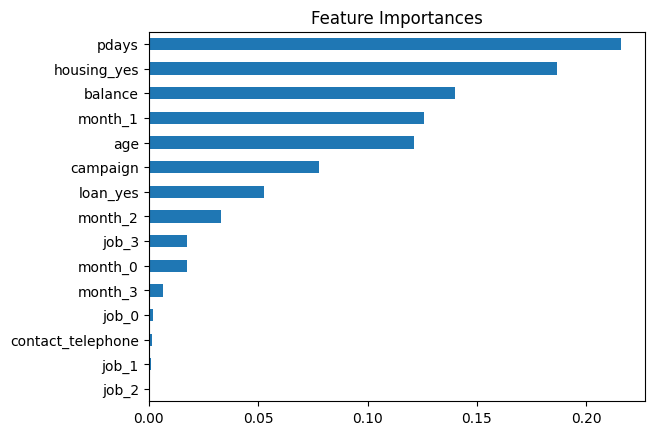

In [90]:
fitur = pd.Series(final_model['model'].feature_importances_, feature_names).sort_values()
fitur.plot(kind='barh', title='Feature Importances')
plt.show()

**Interpretasi :**

- Fitur terpenting dalam model kita adalah **pdays** yaitu jumlah hari yang berlalu setelah nasabah terakhir kali dihubungi diikuti oleh **housing_yes** yaitu fitur mengenai data kepemilikan pinjaman rumah, kemudian **balance** yaitu fitur yang berisi saldo nasabah, **age** atau usia nasabah, **campaign** yaitu fitur yang menunjukan berapa kali kontak yang dilakukan terhadap nasabah, dan seterusnya.

### **SHAP**

In [107]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
# tahap preprocessing (encoding dan scaling)
final_model[:-2]

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan',
                                                   'contact']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month'])]))])

In [103]:
# algoritma/model
final_model[-1]

GradientBoostingClassifier(learning_rate=0.02, max_features=6, n_estimators=70,
                           random_state=0, subsample=0.6000000000000001)

In [104]:
# membuat data train yang dipreprocessing menggunakan onehot dan scaler
X_train_encod = final_model[:-2].fit_transform(X_train)

In [110]:
# membuat nama kolom
onehot_feature = list(final_model[0].transformers_[0][1].get_feature_names_out())
binary_feature = list(final_model[0].transformers_[1][1].get_feature_names_out())
remainder_feature = list(X_train.columns[final_model[0].transformers_[2][2]])
feature_names = onehot_feature + binary_feature + remainder_feature

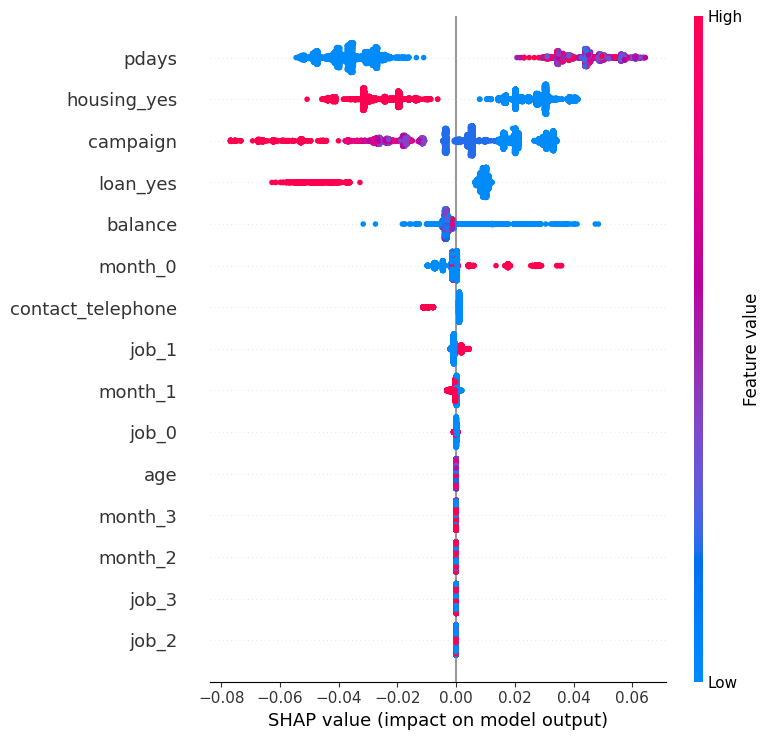

In [111]:
# membuat shap
import shap

shap_values = shap.TreeExplainer(final_model[-1],                                           # model
                                 data = X_train_encod,                                    # data train dipreprocess
                                 feature_dependence="independent",
                                 model_output="probability").shap_values(X_train_encod)
                                 
shap.summary_plot(shap_values, X_train_encod,feature_names = feature_names)

Berdasarkan SHAP value, kita dapat melihat bahwa fitur yang paling penting diantaranya:
- `pdays`
- `housing`
- `campaign`
- `loan`
- `balance`

Hal ini sedikit berbeda dengan hasil berdasarkan feature importance

Dan fitur yang paling tidak penting yaitu:
- `job`
- `month`


**Interpretasi**

- Nasabah dengan `pdays` (warna merah), yaitu jumlah hari yang berlalu setelah nasabah terakhir kali dihubungi semakin lama/tinggi cenderung memiliki kemungkinan akan melakukan deposit yang lebih tinggi. Sedangkan semakin sebentar  `pdays` (warna biru), maka semakin besar kemungkinan untuk tidak melakukan deposit.
- Semakin tinggi `Housing-yes` (warna biru), yaitu apabila nasabah tidak memiliki cicilan rumah maka semakin besar kemungkinan pelanggan untuk melakukan deposit.
- Semakin jarang `campaign` (warna biru), semakin besar kemungkinan pelanggan untuk melakukan deposit
- Nasabah dengan `Loan` yes (warna biru), yaitu apabila nasabah tidak memiliki cicilan pribadi maka semakin besar kemungkinan pelanggan untuk melakukan deposit.
- Nasabah dengan `balance` (warna biru), yaitu semakin kecil nilai saldo di rekeningnya, maka semakin besar kemungkinan nasabah untuk melakukan deposit.


### **Confusion Matrix**

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61       556
           1       0.68      0.77      0.72       669

    accuracy                           0.68      1225
   macro avg       0.67      0.67      0.67      1225
weighted avg       0.68      0.68      0.67      1225



Berdasarkan hasil classification report model, dapat disimpulkan bahwa bila seandainya menggunakan model ini untuk memfilter/menyaring list kandidat nasabah, maka model ini dapat mengurangi 56% kandidat nasabah tidak potensial untuk tidak di approach melalui kampanye, dan model dapat memprediksi dengan benar 77% kandidat nasabah yang tertarik. (berdasarkan recall)

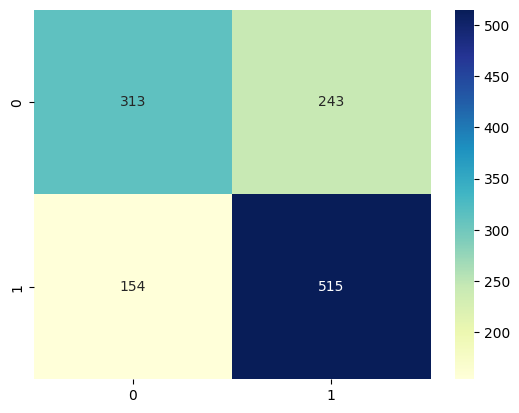

In [92]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='YlGnBu');

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model yang telah kita buat didapati:
- Jumlah calon nasabah yang aktualnya deposit dan diprediksi akan deposit (True Positive) : 515 orang
- Jumlah calon nasabah yang aktualnya deposit tetapi diprediksi tidak akan deposit (False Negative) : 154 orang
- Jumlah calon nasabah yang aktualnya tidak deposit dan diprediksi tidak akan deposit (True Negative) : 313 orang
- Jumlah calon nasabah yang aktualnya tidak deposit tetapi diprediksi akan deposit (False Positive) : 243 orang
- Jumlah calon nasabah yang diprediksi akan deposit sebanyak 515 + 243 = 758 orang
- Jumlah calon nasabah yang diprediksi tidak akan deposit sebanyak 154 + 313 = 467 orang

Jumlah calon nasabah untuk dasar perhitungan :
- calon nasabah yang kita tawarkan deposit = 1225 orang
- calon nasabah yang aktualnya deposit = 669 orang (154 + 515 orang)



Saat kita menggunakan machine learning, kita hanya menawarkan produk ke calon nasabah yang diprediksi akan term deposit saja.

Jumlah Nasabah untuk dasar perhitungan :
- Calon nasabah yang dihubungi adalah nasabah yang diprediksi  deposit = TP + FP = 515 + 243 = 758 orang
- Calon nasabah yang di prediksi dan actualnya deposit = TP = 515



### **Model Limitation**

- age : Nasabah dengan rentang usia 18-95 tahun 
- job : Semua nilai unik pada kolom job (11 pekerjaan), tidak termasuk nilai 'unknown' 
- balance : Nasabah dengan saldo -6847 sampai 66653 dollar 
- housing : Semua nasabah baik mempunyai pinjaman perumahan atau tidak 
- loan : Semua nasabah baik mempunyai pinjaman pribadi atau tidak 
- contact : Semua nilai unik pada kolom contact (cellular/telephone), tidak termasuk nilai 'unknown' 
- month : Semua bulan dalam 1 tahun  
- campaign : Jumlah kontak yang dilakukan selama kampanye dengan rentang 1-43 kali 
- pdays : jumlah hari yang berlalu setelah nasabah terakhir dihubungi dari kampanye sebelumnya dengan rentang -1 - 854 hari
- poutcome : Fitur ini telah dihilangkan pada permodelan sehingga sudah tidak bisa digunakan untuk prediksi selanjutnya 

## **CONCLUSION & RECOMMENDATION**
----

### **Conclusion:**

- Model klasifikasi terbaik yang diperoleh untuk memprediksi calon nasabah yang deposit atau tidak pada dataset ini adalah Gradient Boost dengan metriks f1_score sebesar 0.72

- Parameter terbaik untuk final modelnya adalah :
    - n_estimator : 70
    - max_features : 6
    - max_depth : 3
    - subsample: 0.60
    - learning_rate: 0.02


- Berdasarkan hasil analisis, nasabah yang cenderung melakukan deposit adalah nasabah yang bekerja sebagai management, nasabah yang tidak mempunyai pinjaman perumahan atau pinjaman pribadi, dan nasabah yang dihubungi melalui seluler.
- Tanpa pemodelan, Bank akan melakukan kampanye terhadap 1225 kandidat nasabah yang mana tidak semuanya adalah kandidat nasabah potensial untuk menaruh deposit. Sedangkan dengan pemodelan, Bank dapat memfokuskan target kampanye menjadi hanya 758 kandidat nasabah potensial saja, yang mana ini akan meningkatkan efisiensi bagi bank baik dari segi finansial maupun waktu.


### **Recomendation:**



- Menambahkan lebih banyak fitur yang kemungkinan bisa meningkatkan score model seperti status pernikahan, jumlah anggota keluarga, income, dan sebagainya.
- Menghindari pengisian data dengan nilai 'unknown' atau 'other' karena menyebabkan score model menjadi turun.
- Karena fitur poutcome mengandung nilai 'unknown' dan 'other' yang sangat banyak, fitur tersebut kita hilangkan pada pemodelan ini. Apabila fitur tersebut akan digunakan pada proses modeling selanjutnya, nilai harus diisi dengan 'Success' atau 'Failure' 
- Pada dataset, terlihat bahwa marketing campaign masih dilakukan secara tradisional yaitu melalui telemarketing. Seiring dengan perkembangan zaman, ada baiknya kita bisa mulai meningkatkan kegiatan marketing campaign kita melalui internet (digital marketing) supaya bisa menjangkau calon nasabah secara lebih luas dan lebih efisien.


## **Saving Model**

Pickle

In [93]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
import pickle

In [95]:
# Saving Model
# best model
final_model = random_gradboost.best_estimator_

# fitting model
final_model.fit(X,y)

# save
pickle.dump(final_model, open('model_gradboost_for_classification.sav', 'wb'))

In [96]:
# Load Model
model_loaded_pickle = pickle.load(open('model_gradboost_for_classification.sav','rb'))

**Predict to existing Data**

In [97]:
X_test.iloc[[0]]

,age,job,balance,housing,loan,contact,month,campaign,pdays
4007,43,management,3518,no,no,cellular,dec,2,196


In [98]:
# model_loaded_pickle.predict(X_test.iloc[[0]])

In [99]:
# actual tidak Churn
y_test.iloc[0]

1

In [100]:
model_loaded_pickle.predict(X_test.iloc[[0]])

array([1])

In [101]:
X_test.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month',
       'campaign', 'pdays'],
      dtype='object')